In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("/config/workspace/dataset/Algerian_forest_fire.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
241,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [9]:
## drop day month and year

In [10]:
df.drop(['day', 'month', 'year'], axis=1 , inplace=True)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df["Classes"].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [13]:
##Encoding

In [14]:
df["Classes"]= np.where(df["Classes"].str.contains("not fire"),0,1)

In [15]:
df["Classes"].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [16]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [17]:
## take indipendent feature and dependent feature

In [18]:
X= df.drop("FWI",axis = 1)
y = df["FWI"]

In [19]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [20]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [21]:
X.shape, y.shape

((242, 11), (242,))

In [22]:
## Train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train = train_test_split

In [25]:
X_train,X_test,y_train,y_test = train(X,y ,test_size=0.25 , random_state=42)

In [26]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((181, 11), (61, 11), (61,), (181,))

In [27]:
## Feature selection on the basis of correlation

In [28]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

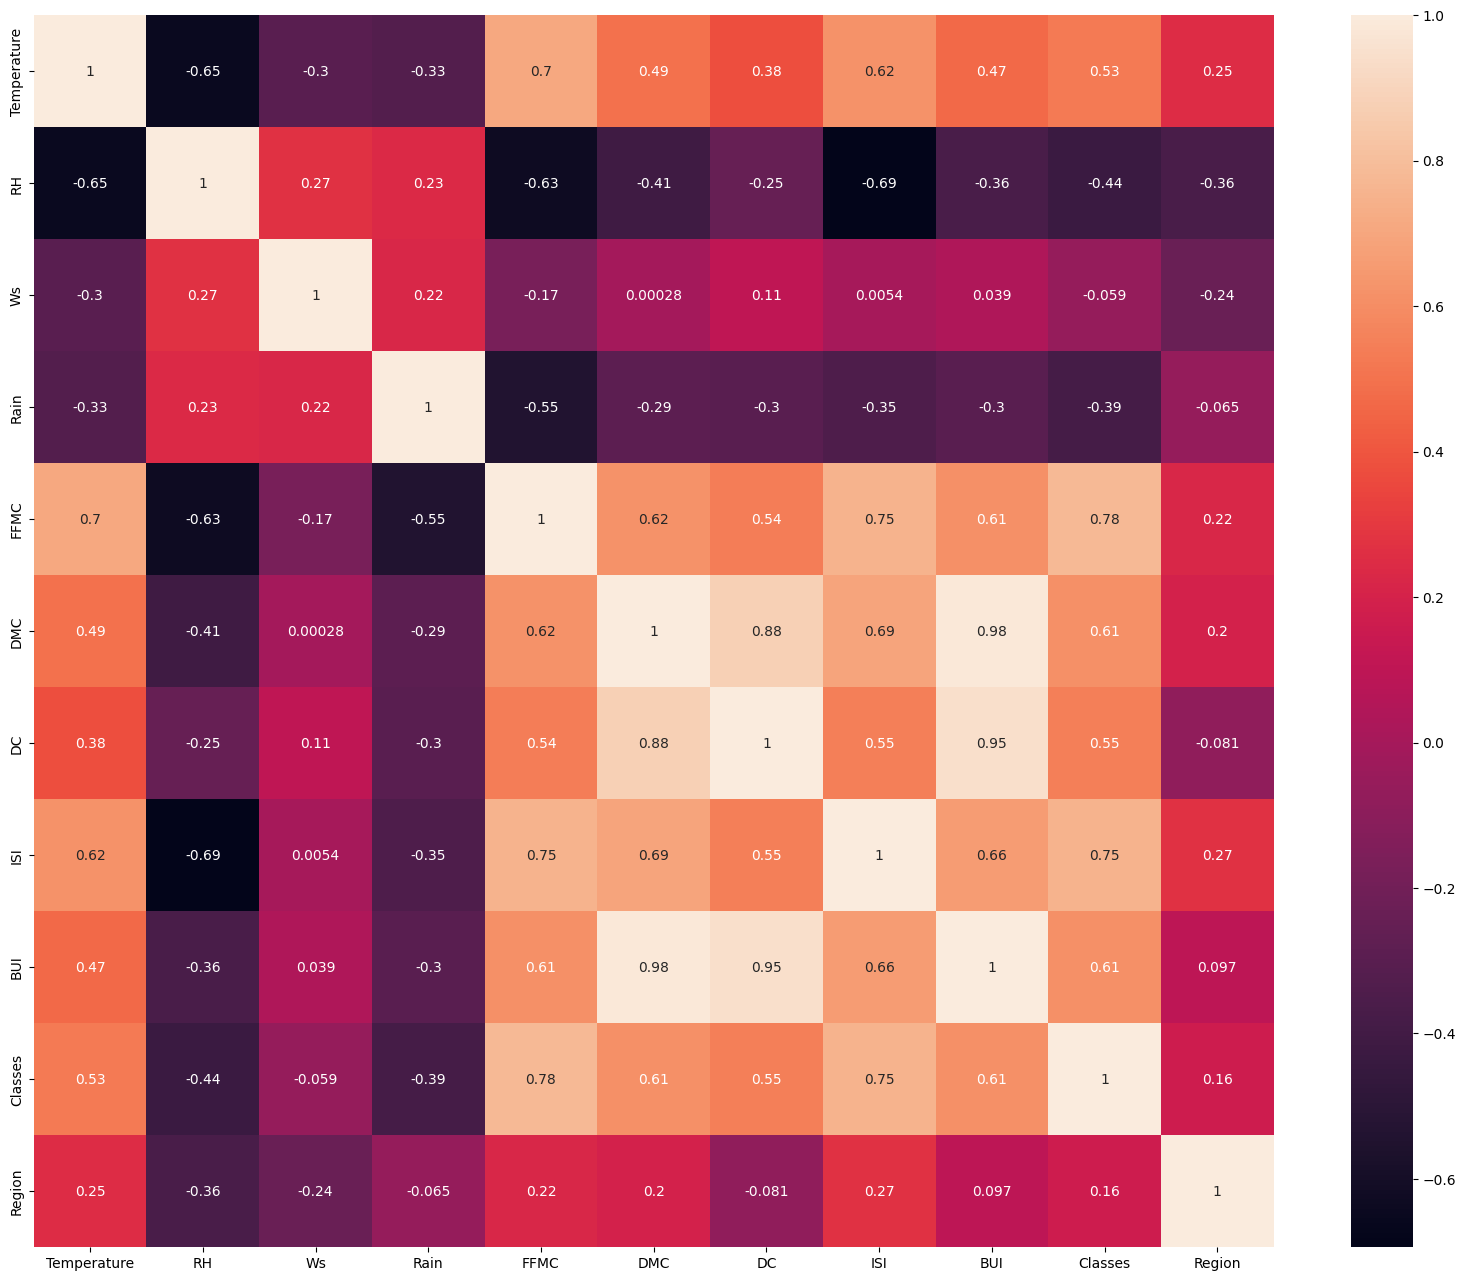

In [29]:
## Check for multicolinearity
plt.figure(figsize=(20,16))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [30]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colnames = corr_matrix.columns[i]
                col_corr.add(colnames)
    return col_corr

In [31]:
## threshold values by domain expert
corr_features = correlation(X_train,.85)

In [32]:
corr_features

{'BUI', 'DC'}

In [33]:
## Drop the multicoleanarity value

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## standerdization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

## Box plot to understand the effect of scaled down

/tmp/ipykernel_387/3815933290.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


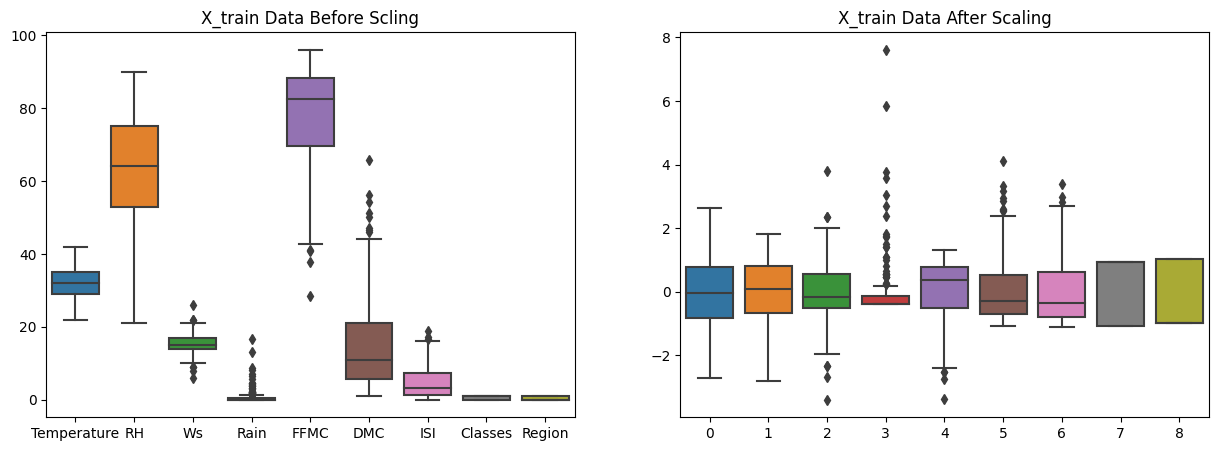

In [36]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Data Before Scling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train Data After Scaling")
plt.show()

In [37]:
## liner regression model

Mean ansolute eroor 0.8512142101975181
R2 score is 0.9755741549678952


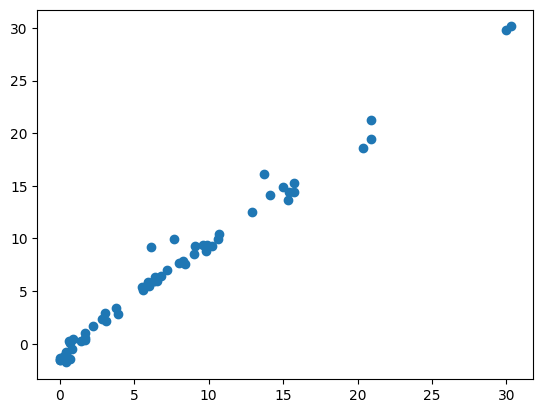

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean ansolute eroor" , mae)
print("R2 score is" , score)
plt.scatter(y_test,y_pred)

## lasso Regression

Mean absolute error 0.9844679399280253
R2 score is 0.9576617587983329


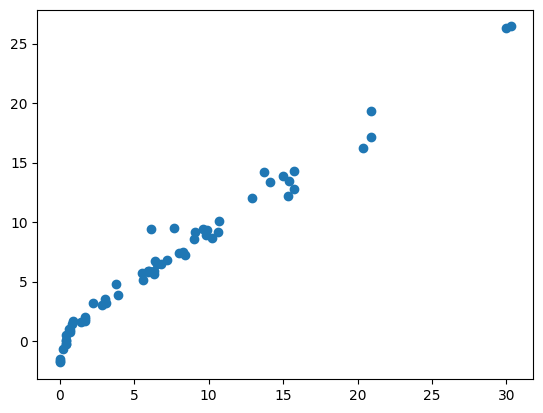

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print ("Mean absolute error" , mae)
print ("R2 score is" , score)
plt.scatter(y_test,y_pred)

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error is 0.8519967092892726
R2 score is 0.9741049321571345


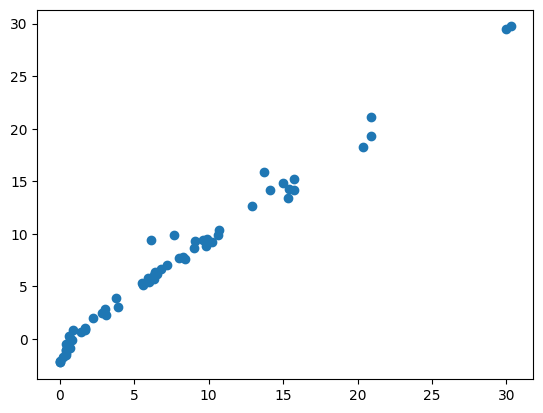

In [41]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error is" ,mae)
print("R2 score is" ,score)

## Ridge regression model

Mean absolute error is 0.851029376501632
R2 Score 0.9753222396484302


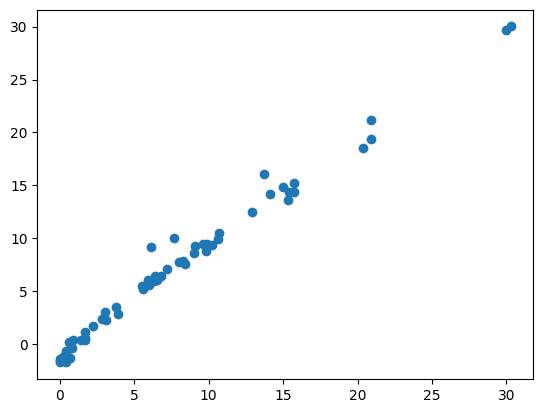

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error is" , mae)
print("R2 Score" , score)
plt.scatter(y_test,y_pred)

Mean absolute error is 0.9422213351169729
R2 Score is 0.9696263985528115


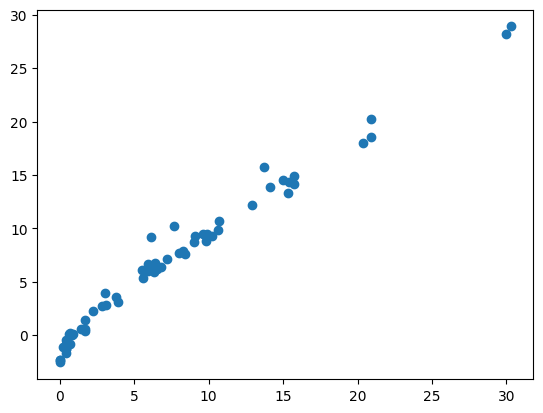

In [43]:
from sklearn.linear_model import RidgeCV
ridgecv =RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error is" , mae)
print("R2 Score is" , score)

In [44]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean absolute error is 0.9422213351169729
R2 Score is 0.9696263985528115


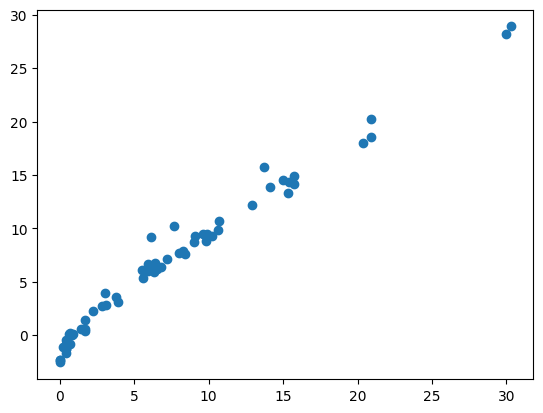

In [45]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error is" , mae)
print("R2 Score is" , score)

Mean absolute error is 0.9422213351169729
R2 Score is 0.9696263985528115


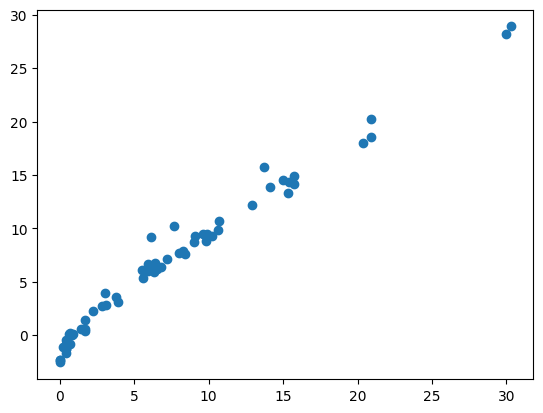

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error is" , mae)
print("R2 Score is" , score)

In [47]:
elasticcv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

In [48]:
## pickle standered scaler and ridge

In [49]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

In [50]:
ridge

Ridge()

In [51]:
scaler

StandardScaler()

In [52]:
import pickle
pickle.dump(ridge,open("ridge.pkl" , "wb"))
pickle.dump(scaler,open("scaler.pkl" , "wb"))

In [ ]:
file = open('/config/workspace/models/scaler.pkl','wb')
pickle.dump(scaler,file)
file.close()